# PCA and SVD for dimension reduction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from sklearn.decomposition import PCA

## Original  data

Note: The data must be **centered** to show the relationship of PCA on covariance matrix and SVD on data matrix.

In [3]:
n=100
μ = [0,0]
Σ = [[1,2],[2,5]]

x = np.random.multivariate_normal(μ, Σ, n)

### Centered data

We assume that the matrix has features in the columns.

In [4]:
x = x - x.mean(axis=0)

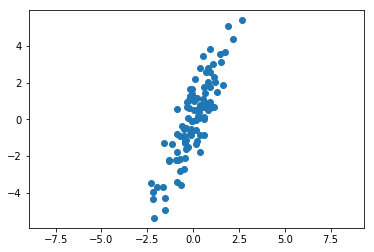

In [5]:
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
pass

### PCA from eigendecomposition of covariance matrix

In [6]:
c = (x.T @ x)/(n-1)

In [7]:
e, v = np.linalg.eigh(c)

In [8]:
e

array([0.20004802, 5.548606  ])

In [9]:
idx = np.argsort(e)[::-1]

In [10]:
e = e[idx]

In [11]:
v = v[:, idx]

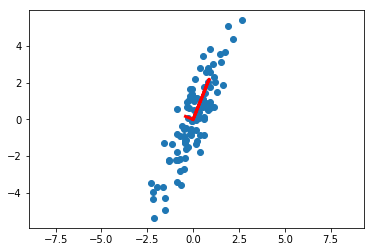

In [12]:
w = np.c_[np.sqrt(e[0]) * v[:, 0], np.sqrt(e[1]) * v[:, 1]]

plt.scatter(x[:, 0], x[:, 1])
plt.plot([0,w[0,0], 0, w[0,1]], 
         [0,w[1,0], 0, w[1,1]], 
         c='red', linewidth=3)
plt.axis('equal')
pass

### Principal components

The principal components are given by $XV$

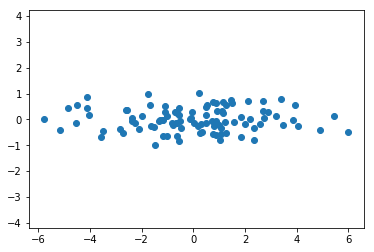

In [13]:
y1 = x @ v
plt.scatter(y1[:, 0], y1[:, 1])
plt.axis('equal')
pass

### Reduce dimensionality

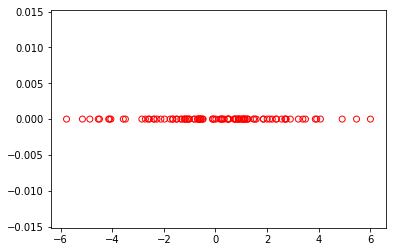

In [14]:
plt.scatter(y1[:,0], np.zeros(n), edgecolor='red', facecolor='none')
pass

## PCA from SVD of data matrix

In [15]:
u, s, vt = np.linalg.svd(x, full_matrices=False)

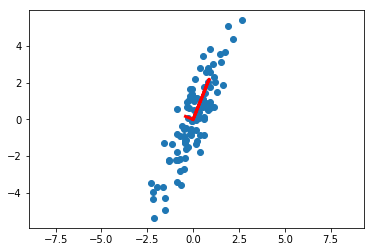

In [16]:
w = np.c_[s[0]/np.sqrt(n-1) * vt[0, :], s[1]/np.sqrt(n-1) * vt[1, :]]

plt.scatter(x[:, 0], x[:, 1])
plt.plot([0,w[0,0], 0, w[0,1]], 
         [0,w[1,0], 0, w[1,1]], 
         c='red', linewidth=3)
plt.axis('equal')
pass

### Principal components

The principal components are given by $XV$ 

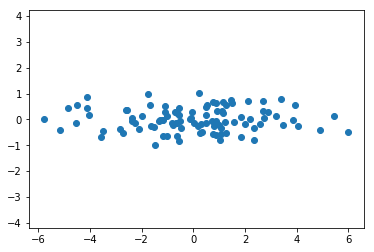

In [17]:
y2 = x@vt.T

plt.scatter(y2[:, 0], y2[:, 1])
plt.axis('equal')
pass

$XV = U \Sigma$

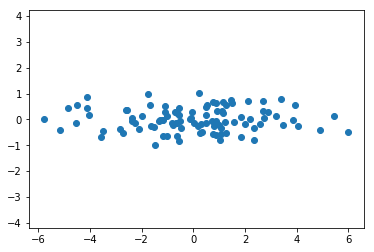

In [18]:
y2a = u @ np.diag(s)

plt.scatter(y2a[:, 0], y2a[:, 1])
plt.axis('equal')
pass

### Reduce dimensionality

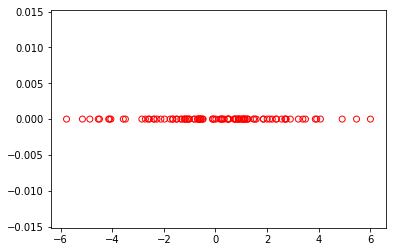

In [19]:
plt.scatter(y2[:,0], np.zeros(n), edgecolor='red', facecolor='none')
pass

## PCA from package

In [20]:
pca = PCA()

In [21]:
y3 = pca.fit_transform(x)

### Principal components

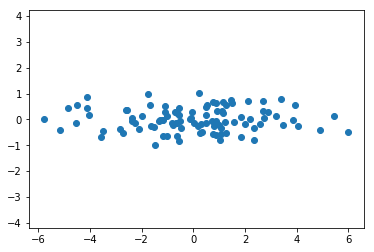

In [22]:
plt.scatter(y3[:, 0], y3[:, 1])
plt.axis('equal')
pass

In [23]:
pca1 = PCA(n_components=1)
y4 = pca1.fit_transform(x)

### Reduce dimensionality

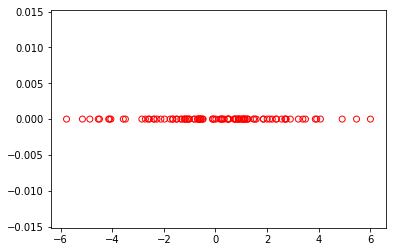

In [24]:
plt.scatter(y4[:,0], np.zeros(n), edgecolor='red', facecolor='none')
pass